In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cubic spline function
def IT21ta_ZH04_S5_Aufg2(x,y,xx):
    if x.size < 2:
        return 0
    a = y[:-1]
    h = x[1:] - x[:-1]
    c = np.zeros(x.size)

    if x.size > 2:
        A = np.diag(2*(h[:-1] + h[1:])) + np.diag(h[1:-1], -1) + np.diag(h[1:-1], 1)
        z = 3 * (y[2:] - y[1:-1]) / h[1:] - 3 * (y[1:-1] - y[:-2]) / h[:-1]
        print(z)
        c[1:-1] = np.linalg.solve(A, z)
        print(c)

    b = (y[1:] - y[:-1]) / h[:] - (c[1:] + 2*c[:-1]) * h[:] / 3
    print(b)
    d = (c[1:] - c[:-1]) / (3 * h[:])
    print(d)

    yy = np.zeros(xx.size)
    for k in range(x.size - 1):
        idx = (xx >= x[k]) & (xx <= x[k+1])
        dx = xx[idx] - x[k]
        yy[idx] = a[k] + b[k] * dx + c[k] * dx**2 + d[k] * dx**3

    return yy

In [3]:
x = np.array([4, 6, 8, 10])
y = np.array([6, 3, 9, 0])

xx = np.arange(4, 10, 0.01)
yy = IT21ta_ZH04_S5_Aufg2(x, y, xx)

[ 13.5 -22.5]
[ 0.    2.55 -3.45  0.  ]
[-3.2  1.9  0.1]
[ 0.425 -1.     0.575]


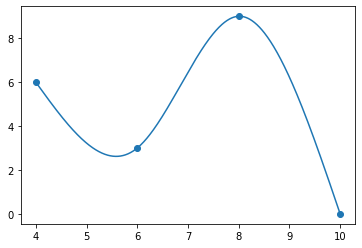

In [4]:
plt.plot(xx, yy)
plt.scatter(x, y)